# Data Bias: Fairness Gerrymandering

In this exercise you will slip into the role of data scientists that are requested as data experts for a judicial dispute.
The scenario in dispute is as follows:

A woman of color applied for a job at the company *MajorEngine*, but got rejected.
She suspects that she got turned down for racist and sexist reasons, *i.e.* because she is a woman of color.
*MajorEngine* refutes this claim and provides employment records in court in order to disprove the claims.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
        
# load the data from the file 'hiring_records_MajorEngine.csv' and inspect the first rows with the pandas function 'head'
# TODO: Your code goes here

df = pd.read_csv('hiring_records_MajorEngine.csv')

df.head()

,gender,race
0,male,white
1,female,white
2,female,white
3,male,white
4,male,hispanic


### Task 1

Slip into the role of a data scientist hired by *MajorEngine* in order to show that based on the employment records 

__(a)__ the company has no racist hiring policy, and 

__(b)__ has no strongly sexist hiring policy. Note that according to the [2020 U.S. census](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States), the perfect, expected percentage of white employees would be 61.6%.

Use bar charts to convey your findings to a lay person and write a comment that explains your figure in favor of *MajorEngine*.

*Hint: While exploring the dataset, look at the ratio of white employees vs. non-white employees, and the ratio of male employees vs. non-male employees. It can also be useful to create a plot of the ideal distribution as comparison.*

<Axes: xlabel='gender'>

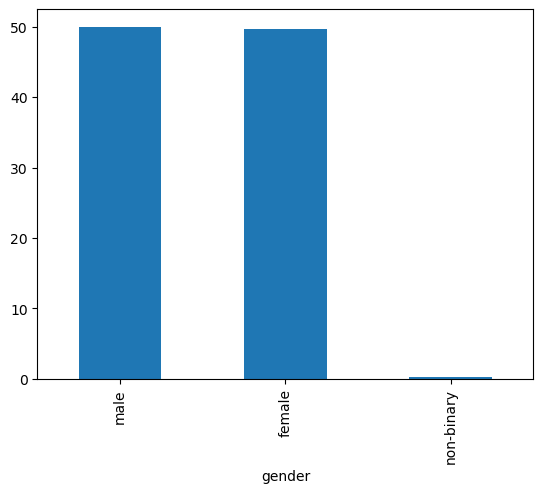

In [31]:
# Part (a): show that MajorEngine has no strongly racist hiring policy

# TODO: Your code goes here

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('hiring_records_MajorEngine.csv')

gender_count = df['gender'].value_counts(normalize=True)*100

gender_count.plot(kind='bar')


<Axes: xlabel='race'>

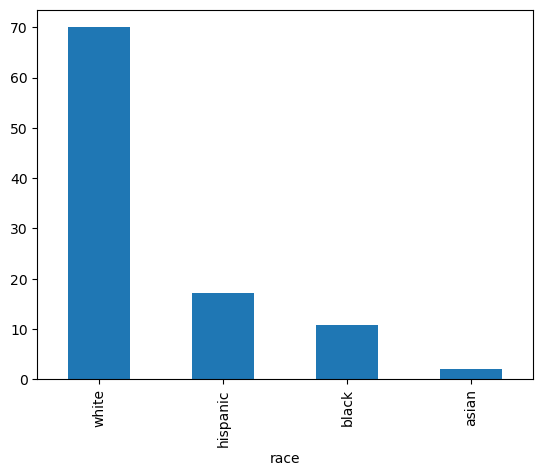

In [32]:
# Part (b): Show that MajorEngine has no sexist hiring policy

# TODO: Your code goes here

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('hiring_records_MajorEngine.csv')

race_count = df['race'].value_counts(normalize=True)*100

race_count.plot(kind='bar')

### Task 2

Slip into the role of a data scientist that works pro bono in order to demonstrate that *MajorEngine* has exhibited a bias in the past and thus is likely to have treated the woman of color unfairly.

Use a confusion matrix to convey your findings to a lay person.

*Hint: While superficially, the argumentation form task 1 may seem sound, you have the sneaking suspicion that you should look at the two attributes 'race' and 'gender' in combination instead of separately.*

*Second hint: You may create a makeshift confusion matrix by creating another pandas dataframe of the four intersectional values and renaming columns and index.*

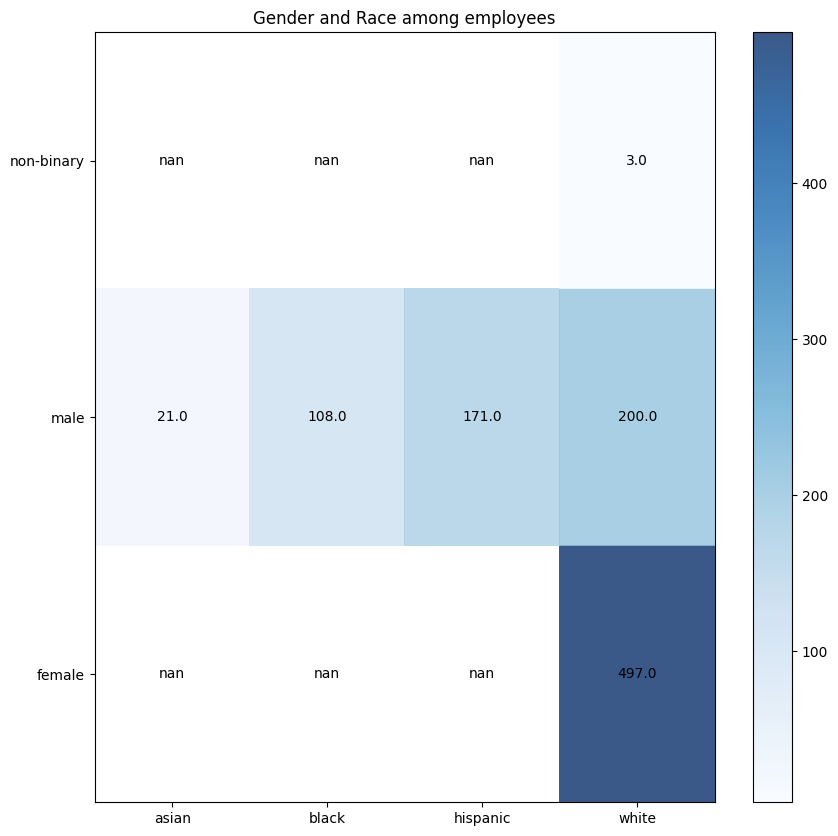

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hiring_records_MajorEngine.csv')

count_df = df.groupby(['gender', 'race']).size().reset_index(name='count')

pivot_df = count_df.pivot(index='gender', columns='race', values='count')

plt.figure(figsize=(10, 10))
plt.title('Gender and Race among employees')
heatmap = plt.pcolor(pivot_df, cmap=plt.cm.Blues, alpha=0.8)

plt.xticks(np.arange(0.5, len(pivot_df.columns), 1), pivot_df.columns)
plt.yticks(np.arange(0.5, len(pivot_df.index), 1), pivot_df.index)

for race_idx, race in enumerate(pivot_df.columns):
    for gender_idx, gender in enumerate(pivot_df.index):
        count = pivot_df.loc[gender, race]
        plt.text(race_idx + 0.5, gender_idx + 0.5, count, ha='center', va='center', color='black')

plt.colorbar(heatmap)
plt.show()


Side note: The court case and its arguments are based on a true story. The provided data is obviously made up in order to paint a clearer picture for pedagogic reasons.